# Hypothesis Testing and Z-Score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

The stack_overflow.feather file contains a sample of the anual survey StackOverflow performs amongst its users. The converted_comp column contains the anual salary in USD of the user.

In [2]:
stack = pd.read_feather('../data/stack_overflow.feather')
stack.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


Lets hypothesize about the average salary of a data scientist and lets say its $110k.
We can calculate the mean of the sample (sample statistic) as our point estimate for the population statistic.

In [3]:
stack.converted_comp.mean()

119574.71738168952

This mean is different from the one in our hypothesis, but is it meaningfully different?
To answer this question we need to generate a bootstrap distribution of the mean.

<Axes: ylabel='Count'>

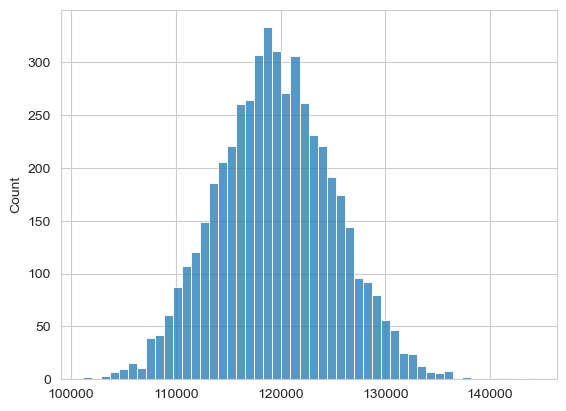

In [4]:
bootstrap_means = []

for i in range(5000):
    bootstrap_means.append(stack.sample(frac=1, replace=True).converted_comp.mean())

sns.histplot(data=bootstrap_means, bins=50)


The histogram is bell shaped, so we can assume it follows a normal distribution.
1100 is on the left of the distribution.

Recall that the standard deviation of the sample statistics on the bootstrap distribution estimates the standard error of the estatistic.

Its time now to standardize values, to get rid of scales and units:

$$
standardizeValue = {{value-mean}\over standardDeviation}
$$

For hypothesis testing, we use the following variation:

$$
z = {{sampleStat-hypothesisParamValue}\over standardError}
$$

In [5]:
z_score=(stack.converted_comp.mean() - 110000)/np.std(bootstrap_means, ddof=1)
z_score

1.7109724827022592

The normal distribution with mean 0 and std 1 is often called the Z distribution.

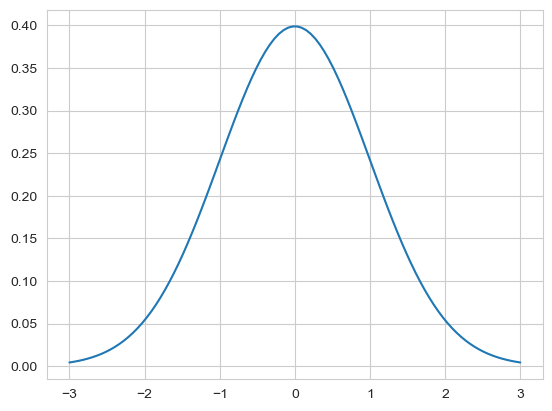

In [6]:
from scipy.stats import norm
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma))
plt.show()

# p-values

A hypothesis is a statement about an unknown population parameter.
A hypothesis test is a test of two competing hypothesis.
These two hypothesis are:
- The null hypothesis (H<sub>0</sub>) representing the existing idea
- The alternative hypothesis (H<sub>A</sub>) representing the challenger idea of the researcher

Either one or the other is true, but not both.
Initially, H<sub>0</sub> is assumed to be true.
This only changes if the sample provides enough evidence to reject H<sub>0</sub>
The test ends in either *reject the H<sub>0</sub>* or *fail to reject H<sub>0</sub>*.
If the evidence from the sample is "significant" that H<sub>A</sub> is true, reject H<sub>0</sub>, else, choose H<sub>0</sub>

The significance level is the key to reject or fail to reject the null hypothesis.

Tests can be one tailed (right tailed or left tailed) or two tailed: 
- Alternative different from null -> two tailed
- Alternative greater than null -> right tailed
- Alternative less than null -> left tailed

For our example:
- H<sub>0</sub>: The proportion of data scientists starting programming as children is 35%
- H<sub>A</sub>: The proportion of data scientists starting programming as children is greater than 35%

This is an example of right tailed test.

P-values measures the strength of support of the null hypothesis. They measure the probability of obtaining a result, assuming the null hypothesis is true.

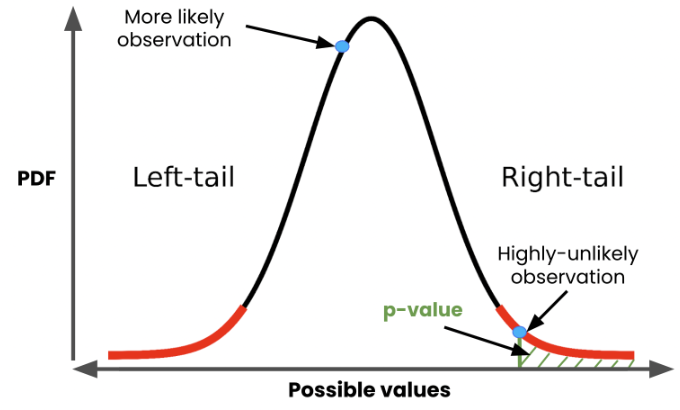

A large p-value, large support for H<sub>0</sub> means the statistic is likely not in the tail of the null distribution.
A small p-value, strong evidence against H<sub>0</sub>, means the statistic is likely in the tail of the null distribution.

P-values are probabilities, so they are always in [0, 1].

To calculate the p-value we need first to calculate the z-score.

In [7]:
prop_child_samp = (stack.age_first_code_cut == 'child').mean()
prop_child_samp

0.39141972578505085

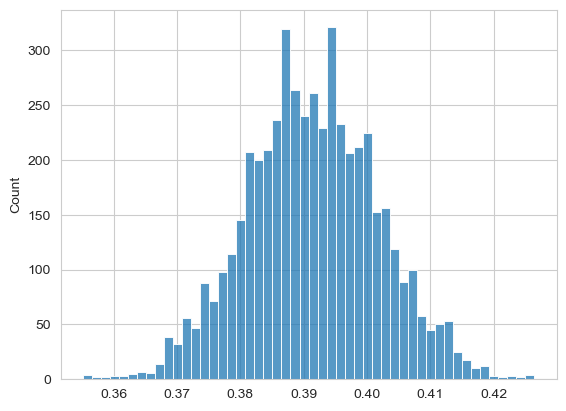

In [8]:
first_code_boot = []

for i in range(5000):
    first_code_boot.append((stack.sample(frac=1, replace=True).age_first_code_cut == 'child').mean())

sns.histplot(data=first_code_boot, bins=50)


z = (prop_child_samp - 0.35)/np.std(first_code_boot, ddof=1)

In [9]:
np.std(first_code_boot, ddof=1)

0.010386391600572661

In [10]:
z

3.9878840869785006

We pass the z-score to the cdf

In [11]:
from scipy.stats import norm

In [12]:
# (1 -)  since its a right tailed test
1 - norm.cdf(z, loc=0, scale=1)

3.333260987614661e-05

# Statistical significance

p-values are used to reject or fail to reject the null hypothesis depending on its value. There is a cutoff point, known as significance level ($\alpha$), that represents the threshold for 'beyond a reasonable doubt'.

Common values for this significance level are 0.2, 0.1, 0.05 and 0.01. 

If p<= $\alpha$ reject H<sub>0</sub>, else, fail to reject H<sub>0</sub>

The significance level should be set prior to conducting the hypothesis test.



In [13]:
# 1. Set the confidence level
alpha=0.05

# 2. Calculate the z value
prop_child_samp = (stack.age_first_code_cut=='child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot, ddof=1)

z = (prop_child_samp-prop_child_hyp)/std_error

# 3. Calculate the p-value
p = 1 - norm.cdf(z, loc=0, scale=1)

In [14]:
if (p<=alpha):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


We have strong evidence for the alternative hypothesis

# Confidence intervals

For a significance level of $\alpha$ its common to choose a confidence interval level of 1-$\alpha$

In [15]:
lower=np.quantile(first_code_boot, 0.025)
upper=np.quantile(first_code_boot, 0.975)
print(f'[{lower}, {upper}]')

[0.3710747456877488, 0.41220698805838124]


# Types of errors

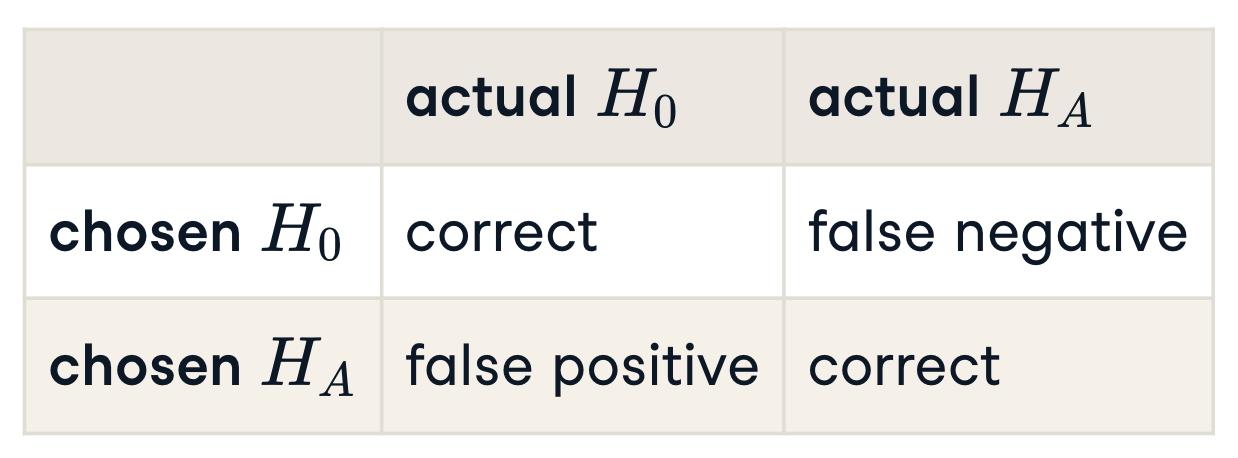

False positives are Type 1 errors
False negatives are Type 2 errors


# Two sample problems

Compare sample statistics across groups of a variable.

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores.

In the stack overflow dataset:
- converted_comp is a numerical variable
- age_first_code_cut is a categorical variable with levels ('child', 'adult')

We can asks questions about differences across the 2 age groups, like:

'Are users who first programmed as a child compensated higher than those that started as adults?'

- H<sub>0</sub>: The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult

    $\mu$<sub>child</sub> = $\mu$<sub>adult</sub>
    
    $\mu$<sub>child</sub> - $\mu$<sub>adult</sub> = 0

- H<sub>A</sub>: The mean compensation (in USD) is greater for those that coded first as a child and those that coded first as an adult

    $\mu$<sub>child</sub> = $\mu$<sub>adult</sub>

    $\mu$<sub>child</sub> - $\mu$<sub>adult</sub> > 0


In [16]:
stack.groupby("age_first_code_cut").converted_comp.mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

Is that increase statistically significant as to reject H0 or could it be explained by sampling variability?

We dont know the sample mean, but we can estimate it using the sample mean.

- $\bar{x}$ a sample mean 
- $\bar{x}$<sub>child</sub> sample mean compensation for coding first as a child
- $\bar{x}$<sub>adult</sub> sample mean compensation for coding first as an adult
- $\bar{x}$<sub>child</sub> - $\bar{x}$<sub>adult</sub> - a test statistic 
- z-score - a (standardized) test statistic
  
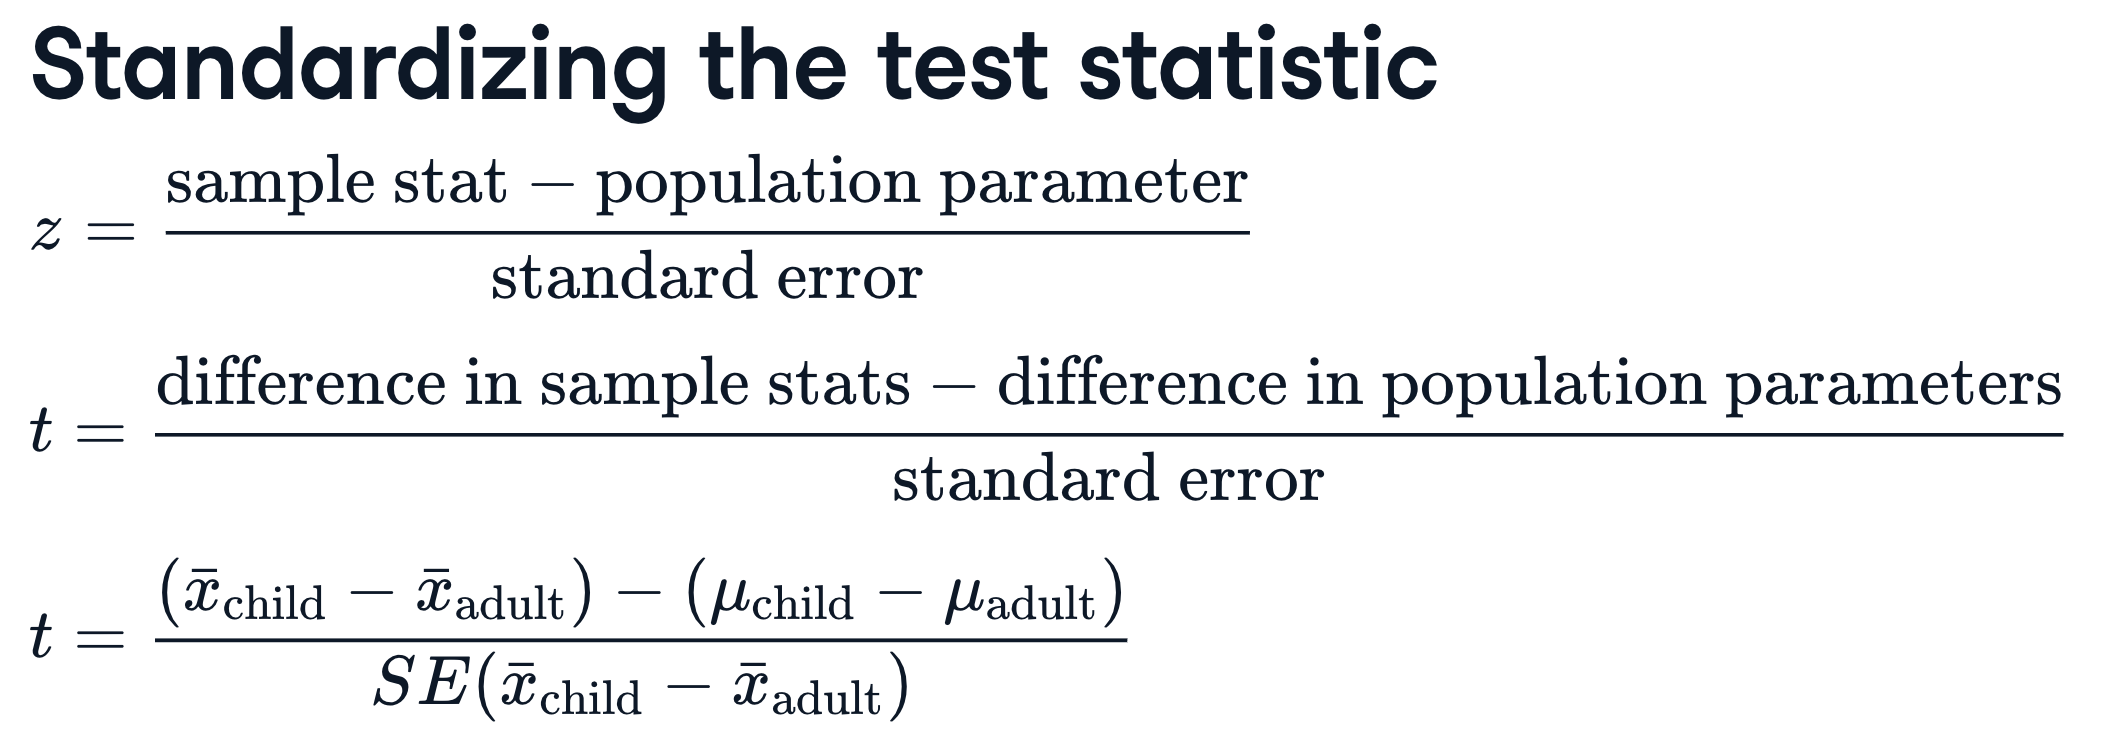

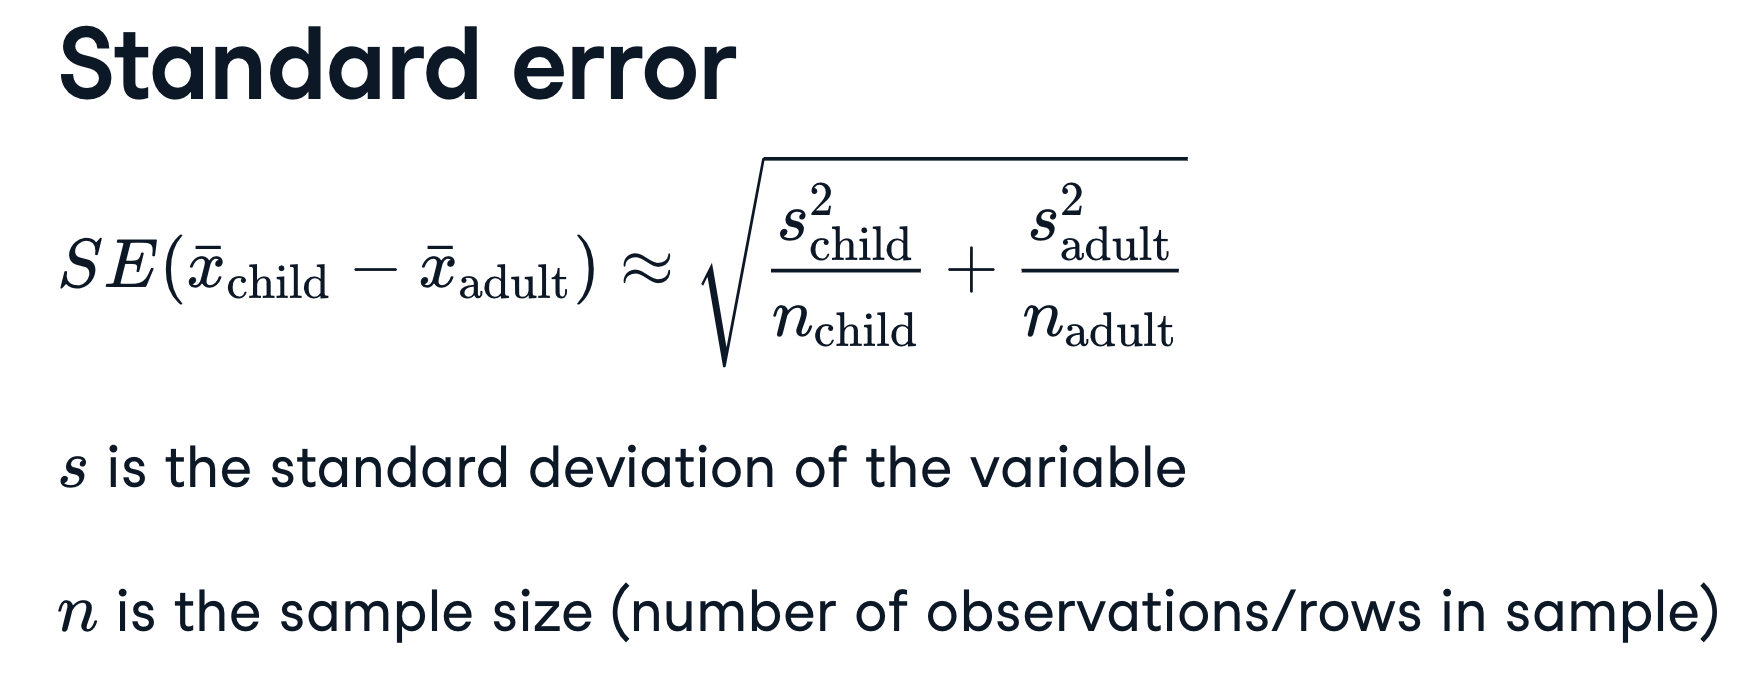

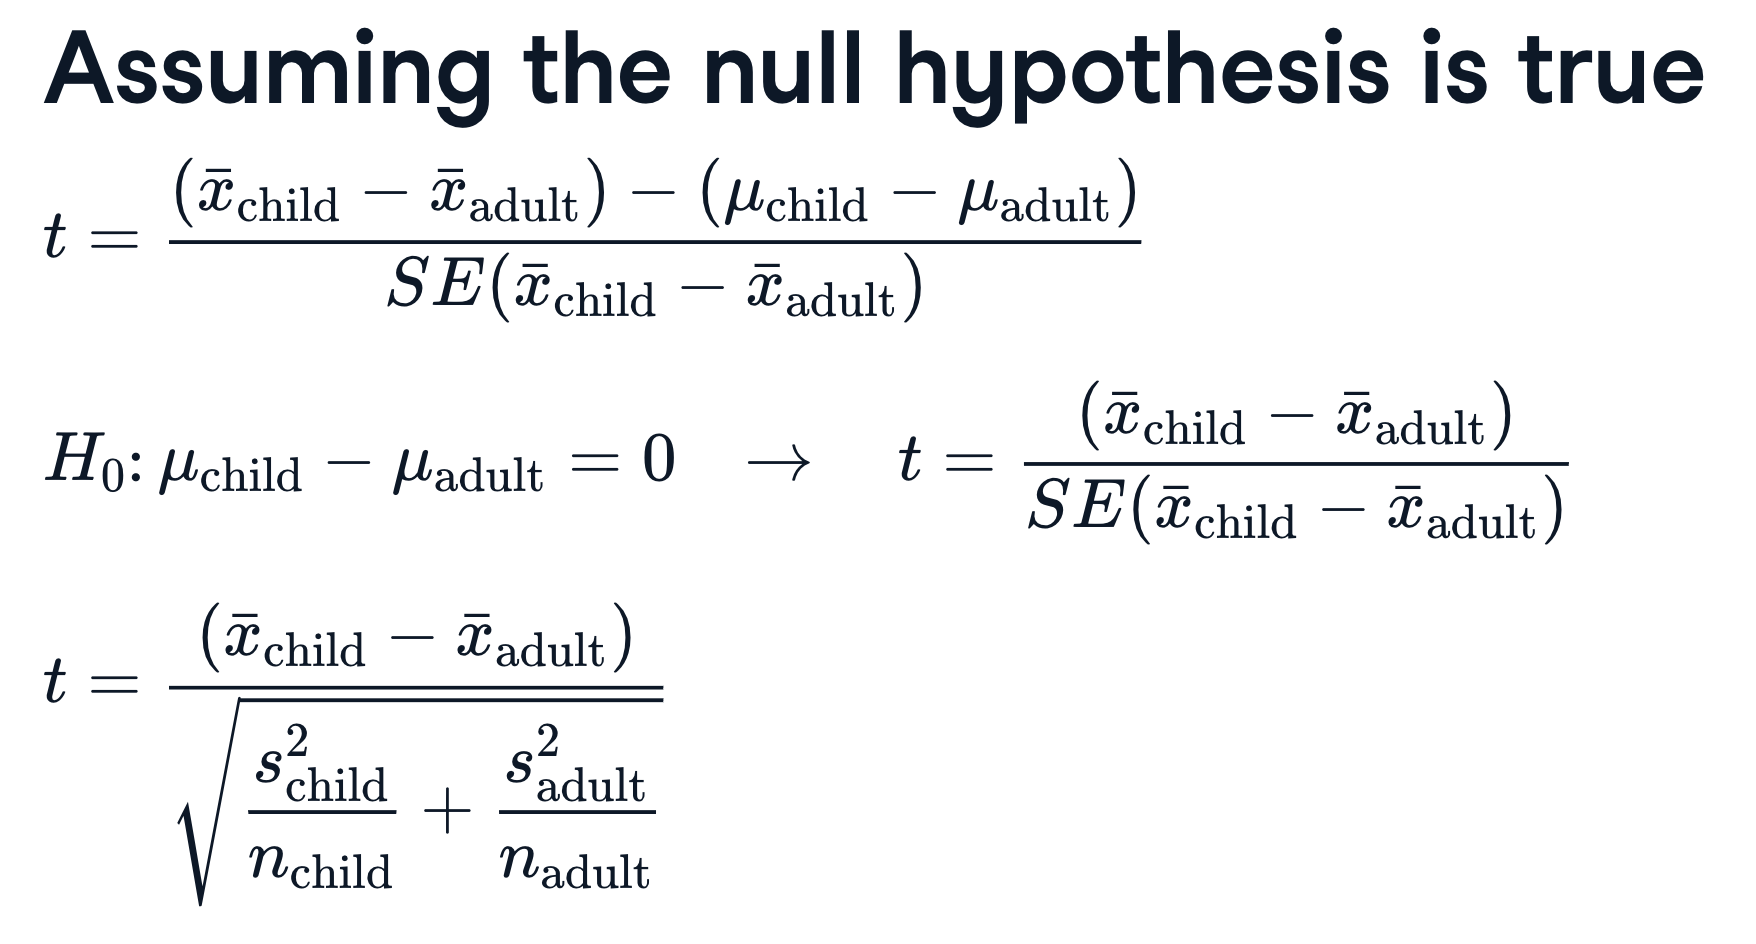

In [ ]:
xbar = stack.groupby('age_first_code_cut').converted_comp.mean()
xbar

In [ ]:
s = stack.groupby('age_first_code_cut').converted_comp.std()
s

In [ ]:
n = stack.groupby('age_first_code_cut').converted_comp.count()
n

In [ ]:
numerator = xbar.loc['child'] - xbar.loc['adult']
denominator = np.sqrt(s.loc['child']**2/n.loc['child'] + s.loc['adult']**2/n.loc['adult'])
t_stat = numerator/denominator

In [ ]:
t_stat

The t-statistic follows a t distribution.

The t distribution has a parameter named degrees of freedom (dof)

The d distribution looks like the normal distribution with fatter tails. T the lower the df the fatter the tails.

## How to calculate the degrees of freedom

Degrees of freedom are the number of observation minus the parameters calculated with them.


Taking back our t test about the compensation for adult and child coders, since it was a *greater than* one, its a right tailed test.

Lets set the significance level to 0.1 meaning that we will reject the hypothesis if the p-value is less or equal to 0.1


In [ ]:
alpha = 0.1

We use the z-statistic when using one sample statistic to estimate a population parameter

The t-statistic is needed when using multiple sample statistics to estimate a population parameter.


In [ ]:
t_stat

We also need the degrees of freedom:

In [ ]:
dof = n.loc['child'] + n.loc['adult'] - 2
dof

In [ ]:
from scipy.stats import t

1 - t.cdf(t_stat, df = dof)

Since our p-value is < than our alpha, we have sufficient evidence as to reject the null hypothesis in favour of the alternative hypothesis: the coders who started as child earn more.

# Paired t-tests

In [ ]:
votes = pd.read_feather('../data/repub_votes_potus_08_12.feather')
votes.head()

The repub_votes_potus_08_12 dataset. Each row represents a presidential election at the county level. The variables in the dataset are the US state, the county within that state, and the percentage of votes for the Republican candidate in 2008, and in 2012.

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

Question: Was the percentage of repuplican candidate votes lower in 2008 than 2012?


H<sub>0</sub>: μ<sub>2008</sub> - μ<sub>2012</sub> = 0

H<sub>A</sub>: μ<sub>2008</sub> - μ<sub>2012</sub> < 0

Lets set alpha as 0.05

In this case the data is paired: each voter percentage refers to the same county
- We want to capture voting patterns in model

Lets go from 2 samples to 1:

In [ ]:
sample_votes = votes
sample_votes['diff'] = sample_votes.repub_percent_08 - sample_votes.repub_percent_12

In [ ]:
sample_votes['diff'].hist(bins=20)

In [ ]:
xbar_diff = sample_votes['diff'].mean()
xbar_diff

We can rewrite the hypothesis as:

H<sub>0</sub>: μ<sub>diff</sub> = 0

H<sub>A</sub>: μ<sub>diff</sub> < 0

In [ ]:
n_diff = len(sample_votes)

In [ ]:
df = n_diff -1

In [ ]:
s_diff = sample_votes['diff'].std()

In [ ]:
s_diff

In [ ]:
t_stat = (xbar_diff - 0)/(np.sqrt(s_diff**2/n_diff))

In [ ]:
t_stat

In [ ]:
p_value= t.cdf(t_stat, df = df)

In [ ]:
p_value

The p value is really small, so we have enough evidence to reject the null hypothesis.

There is an easy way to perform all these calculations using the pingouin package.

In [ ]:
import pingouin

pingouin.ttest(x=sample_votes['diff'], y=0, alternative='less')

Or even

In [ ]:
pingouin.ttest(x=sample_votes['repub_percent_08'],
               y=sample_votes['repub_percent_12'],
               paired=True, 
               alternative='less')

# ANOVA tests


In [ ]:
stack.job_sat.value_counts()

Supose we want to know if the mean annual compensation is different for different levels of job satisfaction.

In [ ]:
sns.boxplot(x='converted_comp', hue='job_sat', data=stack)

Very satisfied looks slightly higher than the others, but to see if they are significantly different, we'll need to use hypothesis tests.

**ANOVA test** (Analysis of variance) is a test for differences between groups

In [ ]:
alpha= 0.2

pingouin.anova(data=stack,
               # dv= dependent variable
              dv='converted_comp',
              between="job_sat")

The p value is found under p-unc. Since its smaller than the alpha we conclude that at least two categories have significantly different compensation.

We can now do pairwise tests comparing the means of each satisfaction level against the others:

In [ ]:
pingouin.pairwise_tests(data=stack,
                       dv='converted_comp',
                       between='job_sat',
                        padjust = 'none')

Since our significance level is 0.2, as we increase the number of tests to be performed we could end up having a false positive. Thats why there is the padjust parameter:

In [ ]:
pingouin.pairwise_tests(data=stack,
                       dv='converted_comp',
                       between='job_sat',
                        padjust = 'bonf')

With the bonferroni correction only 1 test seems to provide statistical significance to reject the null hypothesis

Pingouin provides several p adjustment methods.


# One Sample proportion tests

H<sub>0</sub>: Proportion of stack overflow users under thirty = 0.5

H<sub>A</sub>: Proportion of stack overflow users under thirty != 0.5

When testing proportions:
- p: population proportion
- $\hat{a}$: sample proportion
- p<sub>0</sub>: hypothesized population proportion


In [ ]:
alpha=0.01

stack.age_cat.value_counts(normalize=True)

Lets calculate the values needed for the Z test

In [ ]:
p_hat = (stack.age_cat == 'Under 30').mean()
p_hat

In [ ]:
p_0 = 0.50

In [ ]:
n= len(stack)

In [ ]:
numerator = (p_hat - p_0)
denominator = np.sqrt(p_0*(1-p_0)/n)
z = numerator/denominator
z

Since this is a two-tailed ('not equal') test:

In [ ]:
p_value = 2 * (1 - norm.cdf(z))

In [ ]:
p_value

The p value is smaller than the significance level, so we can reject the null hypothesis.


# Two sample proportion test

Using the stack overflow survey dataset:

H<sub>0</sub>: Proportion of hobbyist users is the same for those under thirty as those at least thirty
- H<sub>0</sub>: p<sub>$\ge$30</sub> - p<sub><30</sub> = 0 

H<sub>A</sub>: Proportion of hobbyist users is different for those under thirty as those at least thirty
- H<sub>A</sub>: p<sub>$\ge$30</sub> - p<sub><30</sub> $\neq$ 0 

Now, to calculate the z-score

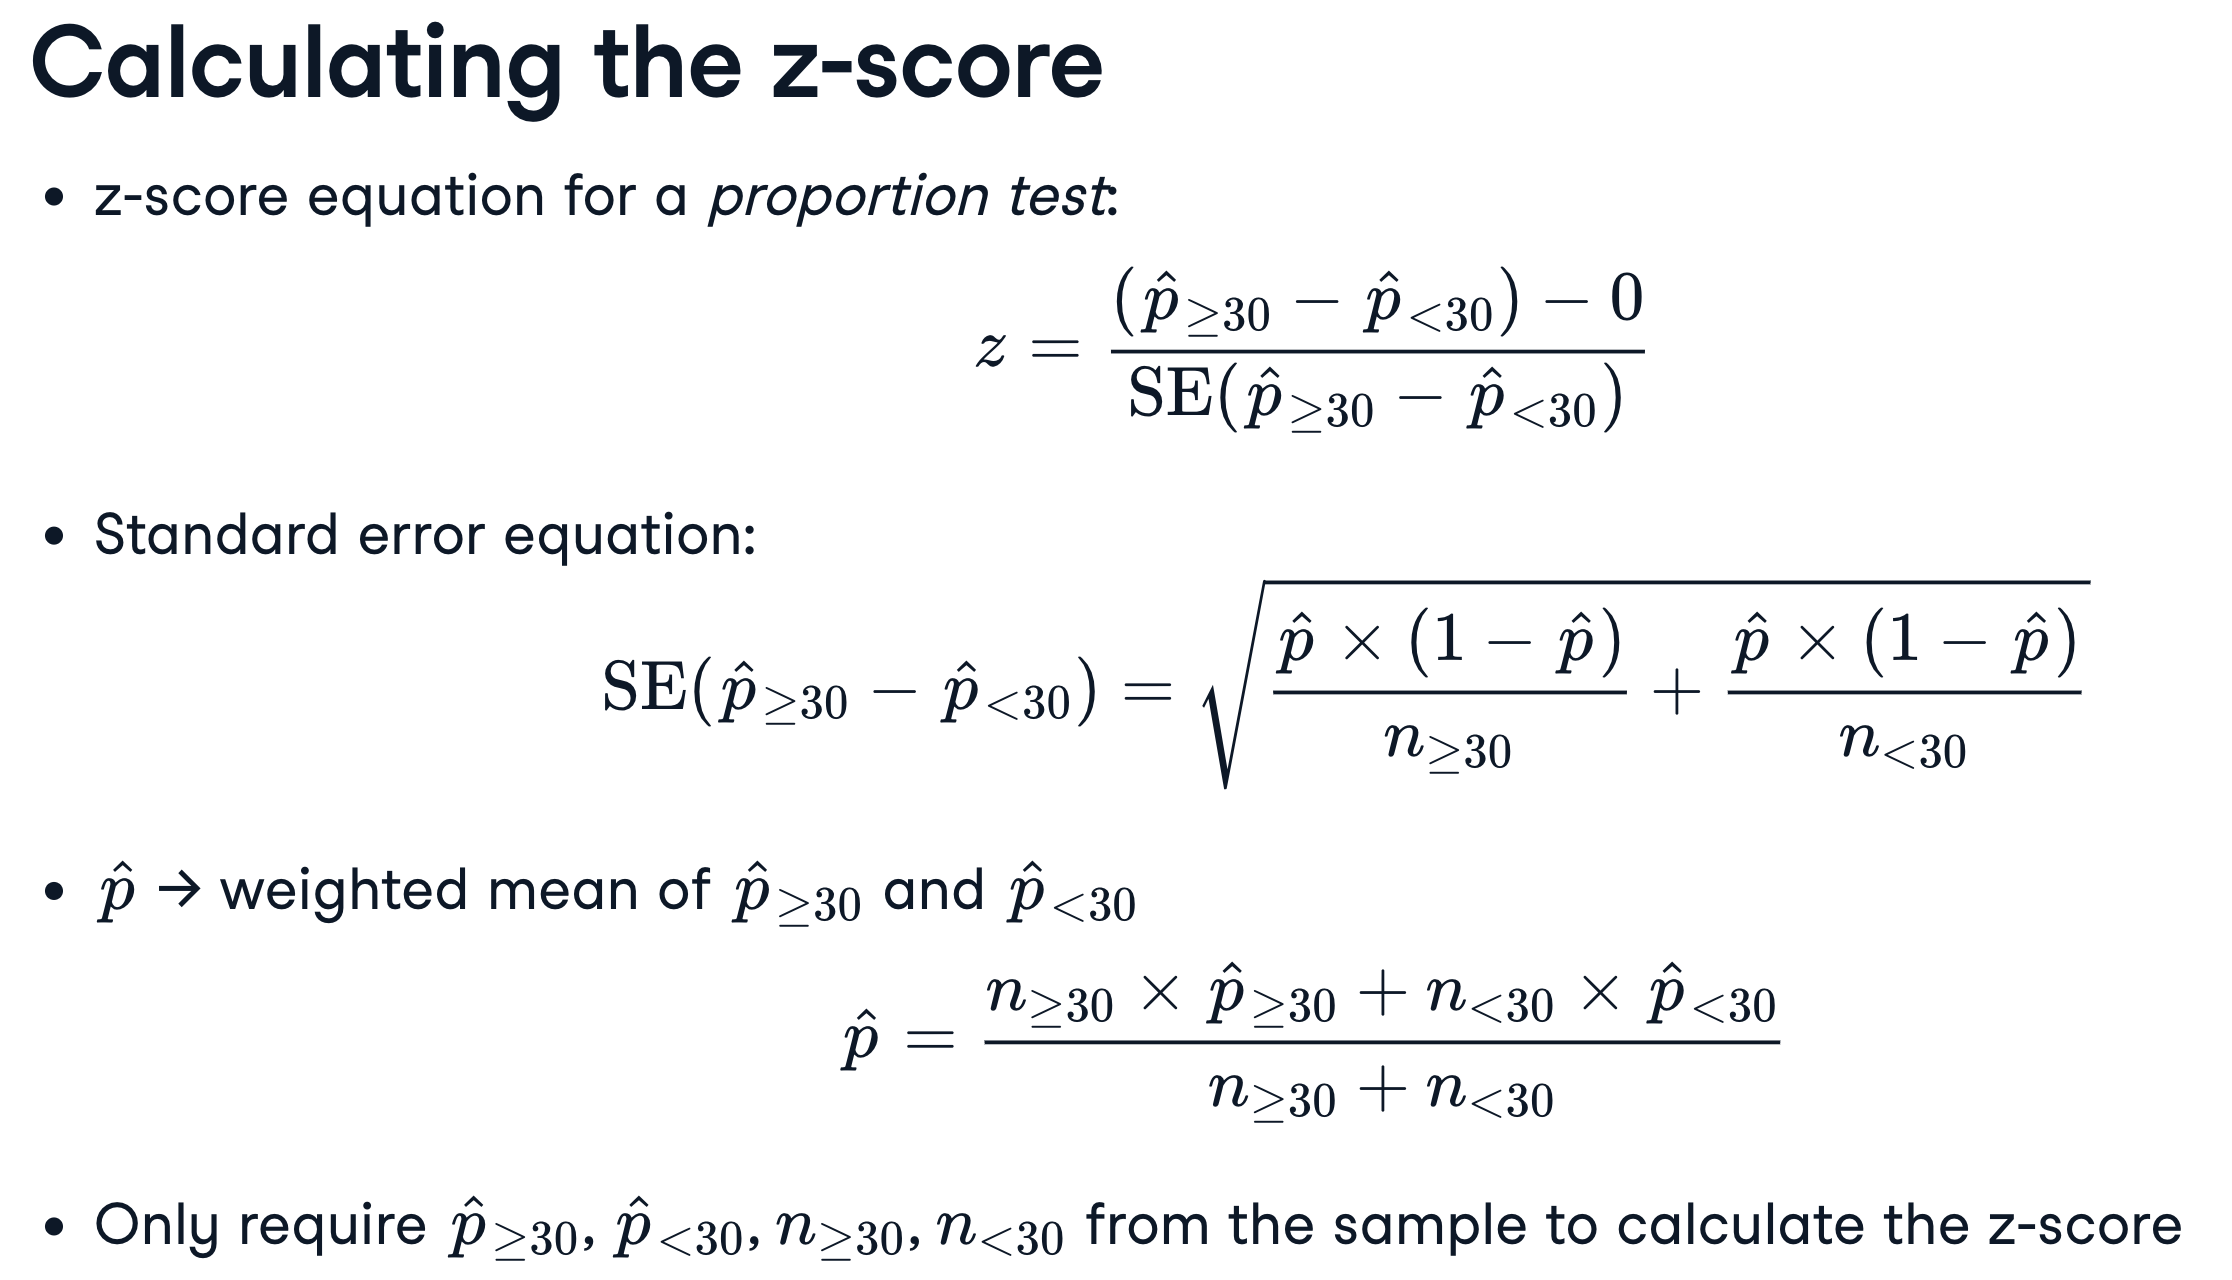

In [ ]:
p_hats = stack.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
n=stack.groupby('age_cat')['hobbyist'].count()

In [ ]:
p_hats

In [ ]:
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print(p_hat_at_least_30, p_hat_under_30)

In [ ]:
n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_at_least_30, n_under_30)

In [ ]:
p_hat = (n_at_least_30*p_hat_at_least_30+n_under_30*p_hat_under_30)/(n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat*(1-p_hat)/n_at_least_30 +
                   p_hat*(1-p_hat)/n_under_30)

z_score = (p_hat_at_least_30-p_hat_under_30)/std_error

print(z_score)


Another way to perform proportion tests is with proportions_ztest()

In [ ]:
stack.groupby('age_cat').hobbyist.value_counts()

In [ ]:
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812+238, 1021+190])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows,
                                    alternative="two-sided")

In [ ]:
print(z_score, p_value)

# Chi-square ($\chi^2$) test of independence

Just as ANOVA extends t-tests to more than two groups, $\chi^2$ tests of independence extend proportion tests to more than two groups.

Statistical independence: proportion of successes in the response variable is the same across al cateogries of the explanatory variable.

In [ ]:
import pingouin 

expected, observed, stats = pingouin.chi2_independence(data=stack, 
                               x='hobbyist', 
                               y='age_cat', 
                               correction=False)

In [ ]:
print(stats)

Lets use the job satisfaction and the age categories from the stack overflow dataset to perform a test

H<sub>0</sub>: Age categories are independent of job satisfaction levels

H<sub>A</sub>: Age categories are dependent of job satisfaction levels



alpha = 0.1

The test statistic is denoted $\chi^2$

Assuming independence, how far away are the observed results from the expected values?



In [ ]:
props = stack.groupby('job_sat')['age_cat'].value_counts(normalize=True)

In [ ]:
props

In [ ]:
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

In [ ]:
expected, observed, stats = pingouin.chi2_independence(data=stack, 
                               x='job_sat', 
                               y='age_cat', 
                               correction=False)

In [ ]:
print(stats)

In [ ]:
Based on the pvalue observed here we can say that the variables are independent.

In [ ]:
expected, observed, stats = pingouin.chi2_independence(data=stack, 
                               y='job_sat', 
                               x='age_cat', 
                               correction=False)

In [ ]:
print(stats)

Swaping the variables end up in the exact same results

# $\chi^2$ goodness of fit tests

Using the stack overflow dataset again:

How do you feel when you discover that you have already visited the top resource?



In [ ]:
purple_link_counts = stack.purple_link.value_counts()

In [ ]:
purple_link_counts

In [ ]:
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
                                        .reset_index(name='n')\
                                        .sort_values('purple_link')

In [ ]:
purple_link_counts

In [ ]:
# Hypothesis

hypothesized = pd.DataFrame(
    {
        'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
        'prop': [1/6,1/6,1/2,1/6]
    }
)
hypothesized

H<sub>0</sub>: The sample matches the hypothesized distribution

H<sub>A</sub>: The sample does not match the hypothesized distribution

$\chi^2 measures how far observed results are from expectations in each group

In [ ]:
alpha = 0.01

n_total = len(stack)

hypothesized['n'] = hypothesized['prop'] * n_total

plt.bar(purple_link_counts['purple_link'], 
        purple_link_counts['n'],
        color='red', 
        label='Observed'
       )
plt.bar(hypothesized['purple_link'], 
        hypothesized['n'],
        color='blue',
        alpha=0.5,
        label='Hypothesized'
       )
plt.legend()
plt.show()


We need to run a hypothesis test to see if this difference is statistically significant.

The $\chi^2$ test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data.

In [ ]:
from scipy.stats import chisquare

chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

# Assumptions in hypothesis testing

Each hypothesis test makes assumptions about the data. Its only when these conditions are met that is appropriate to use hypothesis test:

## Randomness

### Assumption
The samples are random subsets of larger populations

### Consequence
Sample is not representative of the population

### How to check 
Understand how data was collected. No other way to check this. 
Ask the data collector / domain expert

## Independence

### Assumption
Each observation in the dataset is independent

### Consequence
Increased chance of false negative/positive error

### How to check 
Understand how the data was collected 

## Large Sample Size

### Assumption
The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies

### Consequence
Wider confidence intervals
Increased the chance of false negative/positive errors

### How to check 
It depends on the test:

#### t-test
- for one sample test, at least 30 observations
- for two sample test, at least 30 observations in each sample
- for ANOVA, at least 30 observations in each sample
- for paired samples, at least 30 pairs of observations across the samples

#### Proportion tests
- for one sample test, number of successes in sample is greater than or equal to 10 and number of failures in sample is greater than or equal to 10
- for two sample test, number of successes in each sample is greater than or equal to 10 and number of failures in each sample is greater than or equal to 10

#### $\chi^2$ tests
- The number of succeses in each group is greater than or equal to 5. The number of failures in each group is greater than or equal to 5

## Sanity check

If the bootstrap distribution doesnt look normal, assumption(s) likely arent valid
In that case, revisit data collection to check for randomness, independence and sample size

# Non parametric tests

z-test, t-test and ANOVA are all **parametric** tests

They assume a normal distribution and require relatively large sample sizes.

When we dont satisfy these assumptions we can go for non parametric tests

Many non parametric tests use ranks of data



In [ ]:
x = [1, 15, 3, 10, 6]

from scipy.stats import rankdata
rankdata(x)

Non parametric tests are more reliable than parametric tests for small sample sizes and when data isnt normally distributed

## Wilkonson-signed rank test

In [ ]:
votes = pd.read_feather('../data/repub_votes_potus_08_12.feather')

In [ ]:
votes_sample = votes.sample(n=5)

In [ ]:
votes_sample

In [ ]:
votes_sample['diff'] = votes_sample['repub_percent_08'] - votes_sample['repub_percent_12']

votes_sample

In [ ]:
votes_sample['abs_diff'] = np.abs(votes_sample['diff'])

In [ ]:
votes_sample['rank_abs_diff'] = rankdata(votes_sample.abs_diff)

In [ ]:
votes_sample

In [ ]:
# Now lets define t_minus as the sum of the ranks of the obs with neg diff
T_minus = 5+2+3+1+4

T_plus = 0

W = np.min([T_minus, T_plus])
W

In [ ]:
alpha = 0.01

pingouin.wilcoxon(x=votes_sample.repub_percent_08, 
                  y=votes_sample.repub_percent_12, 
                  alternative='less')

# Non parametric ANOVA and unpaired t-tests

The Wilcoxon-Mann-Whitney test, also known as the Mann Whitney U test, is a t-test on the ranks of the numeric input.

Its similar to the previous Wilcoxon test, but works with unpaired data.



In [ ]:
stack = pd.read_feather('../data/stack_overflow.feather')

age_vs_comp = stack[['converted_comp', 'age_first_code_cut']]

In [ ]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',
                                    values='converted_comp')

In [ ]:
age_vs_comp_wide

In [ ]:
alpha=0.01

# Hypothesis: Those who code first as children have a greater compensation

pingouin.mwu(x=age_vs_comp_wide['child'], 
            y=age_vs_comp_wide['adult'], 
            alternative='greater')


As ANOVA extends t-tests to multiple variables, Kruskal-Wallis extends the Wilcoxon-Mann-Whitney to more than 2 groups.

Kruskal-Wallis is a non parametric version of ANOVA



In [ ]:
alpha=0.01

# Is there a significant difference in compensation between job satisfaction groups?
pingouin.kruskal(data=stack, 
                 dv='converted_comp', 
                 between='job_sat')

That small p-value shows that at least there is statistically significant difference between at least two groups